In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_type={
    'product_id' : str,
    'category_id' : str,
    'user_id' : str
}
df_Oct=pd.read_csv('Data 1.csv', dtype=data_type, parse_dates=['event_time'])
df_Nov=pd.read_csv('Data 2.csv', dtype=data_type, parse_dates=['event_time'])
df_all=pd.concat([df_Oct,df_Nov], ignore_index=True)
df_all

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03+00:00,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07+00:00,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07+00:00,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15+00:00,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
8738115,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
8738116,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
8738117,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,NaN,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06
8738118,2019-11-30 23:59:57+00:00,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


In [3]:
df_Oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102283 entries, 0 to 4102282
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     object             
 3   category_id    object             
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        object             
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(7)
memory usage: 281.7+ MB


In [151]:
df_pur=df_all[df_all['event_type']=='purchase']
# df_pur=df_pur[df_pur['price']>=0]

In [152]:
cust_prod=df_pur[['user_id','product_id','user_session']]
cust_prod

,user_id,product_id,user_session
202,474232307,5619862,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
204,474232307,5619866,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
205,474232307,5696184,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
206,474232307,5706784,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
207,474232307,5723503,445f2b74-5e4c-427e-b7fa-6e0a28b156fe
...,...,...,...
8737121,519606434,5802427,dd1ee443-79ba-48b9-a813-606a7d4e9e2c
8737122,519606434,5802432,dd1ee443-79ba-48b9-a813-606a7d4e9e2c
8737123,519606434,5809323,dd1ee443-79ba-48b9-a813-606a7d4e9e2c
8737124,519606434,5833325,dd1ee443-79ba-48b9-a813-606a7d4e9e2c


In [158]:
transactions= [x[1]['product_id'].tolist() for x in list(cust_prod.groupby(['user_id','user_session']))]
print(len(transactions))

65703


In [153]:
cust_prod[cust_prod['product_id'] == '5751422' ]

,user_id,product_id,user_session
375,543446752,5751422,4a01cad9-7368-fd9e-d907-d4d85de0b55c
3278,382827190,5751422,c296c87d-85b8-48ef-8e1d-a8f73b60b3f9
5928,526285483,5751422,1fa58edc-6d5c-43de-8cfa-7545529d85e9
11527,471736294,5751422,7b653959-bf41-41c7-917a-548547f9928a
14117,443333731,5751422,870d5c99-07bd-4ace-abaf-96d27e28fe4f
...,...,...,...
8707423,570733736,5751422,44075638-4c5c-45da-9e7b-b53f7b29a148
8712016,543239660,5751422,c8061200-9cc8-4eea-b1ff-209384acbbb3
8713620,553515853,5751422,08bf5eb9-5b00-4837-a925-2d55a1190f35
8721331,490189038,5751422,5e7851d0-254f-4998-958d-5a77c7e9344c


In [157]:
counter=0
for x in transactions:
#     if '5751383' in x and '5751422' in x:
    if '5814516' in x and '5814517' in x:  
        counter +=1

print(counter)
s=counter/len(transactions)

162
0.002465640838317885


In [139]:
from apyori import apriori
rules=apriori(transactions=transactions, min_support=0.002 , min_confidence=0.5, min_lift=3)

In [140]:
results=list(rules)
print(results)
print(len(results))

[RelationRecord(items=frozenset({'5584838', '5584836'}), support=0.0025265208590170922, ordered_statistics=[OrderedStatistic(items_base=frozenset({'5584836'}), items_add=frozenset({'5584838'}), confidence=0.633587786259542, lift=180.2104689203926), OrderedStatistic(items_base=frozenset({'5584838'}), items_add=frozenset({'5584836'}), confidence=0.7186147186147187, lift=180.2104689203926)]), RelationRecord(items=frozenset({'5584840', '5584836'}), support=0.0021764607399966515, ordered_statistics=[OrderedStatistic(items_base=frozenset({'5584836'}), items_add=frozenset({'5584840'}), confidence=0.5458015267175572, lift=187.75286759122335), OrderedStatistic(items_base=frozenset({'5584840'}), items_add=frozenset({'5584836'}), confidence=0.7486910994764397, lift=187.75286759122335)]), RelationRecord(items=frozenset({'5584844', '5584836'}), support=0.002404760817618678, ordered_statistics=[OrderedStatistic(items_base=frozenset({'5584836'}), items_add=frozenset({'5584844'}), confidence=0.6030534

In [141]:
# Initialize lists to store rule information
antecedents = []
consequents = []
supports = []
confidences = []
lifts = []
convictions = []

# Extract information from each rule
for res in results:
    antecedent = ', '.join(res.ordered_statistics[0].items_base)
    consequent = ', '.join(res.ordered_statistics[0].items_add)
    support = res.support
    confidence = res.ordered_statistics[0].confidence
    lift =  res.ordered_statistics[0].lift
    conviction = (1-support)/(1-confidence)
    
    antecedents.append(antecedent)
    consequents.append(consequent)
    supports.append(support)
    confidences.append(confidence)
    lifts.append(lift)
    convictions.append(conviction)

# Create a DataFrame to display the rules
res_df = pd.DataFrame({
    'Antecedent': antecedents,
    'Consequent': consequents,
    'Support': supports,
    'Confidence': confidences,
    'Lift' : lifts,
    'Conviction' : convictions
})

# Display the DataFrame
top=res_df.sort_values(by='Conviction', ascending=False)
top

,Antecedent,Consequent,Support,Confidence,Lift,Conviction
8,5814516,5814517,0.002466,0.870968,314.424140,7.730891
5,5697463,5677043,0.002055,0.699482,121.261364,3.320749
7,5749154,5749149,0.002466,0.686441,72.161939,3.181326
6,5745313,5745314,0.002679,0.679537,132.485455,3.112123
9,5862936,5862943,0.002161,0.636771,90.951706,2.747136
11,"5809912, 5809911",5809910,0.002283,0.635593,17.192417,2.737921
0,5584836,5584838,0.002527,0.633588,180.210469,2.722271
2,5584836,5584844,0.002405,0.603053,161.066747,2.513173
4,5584838,5584844,0.002116,0.601732,160.713705,2.505558
3,5584838,5584840,0.002055,0.584416,201.035901,2.401306


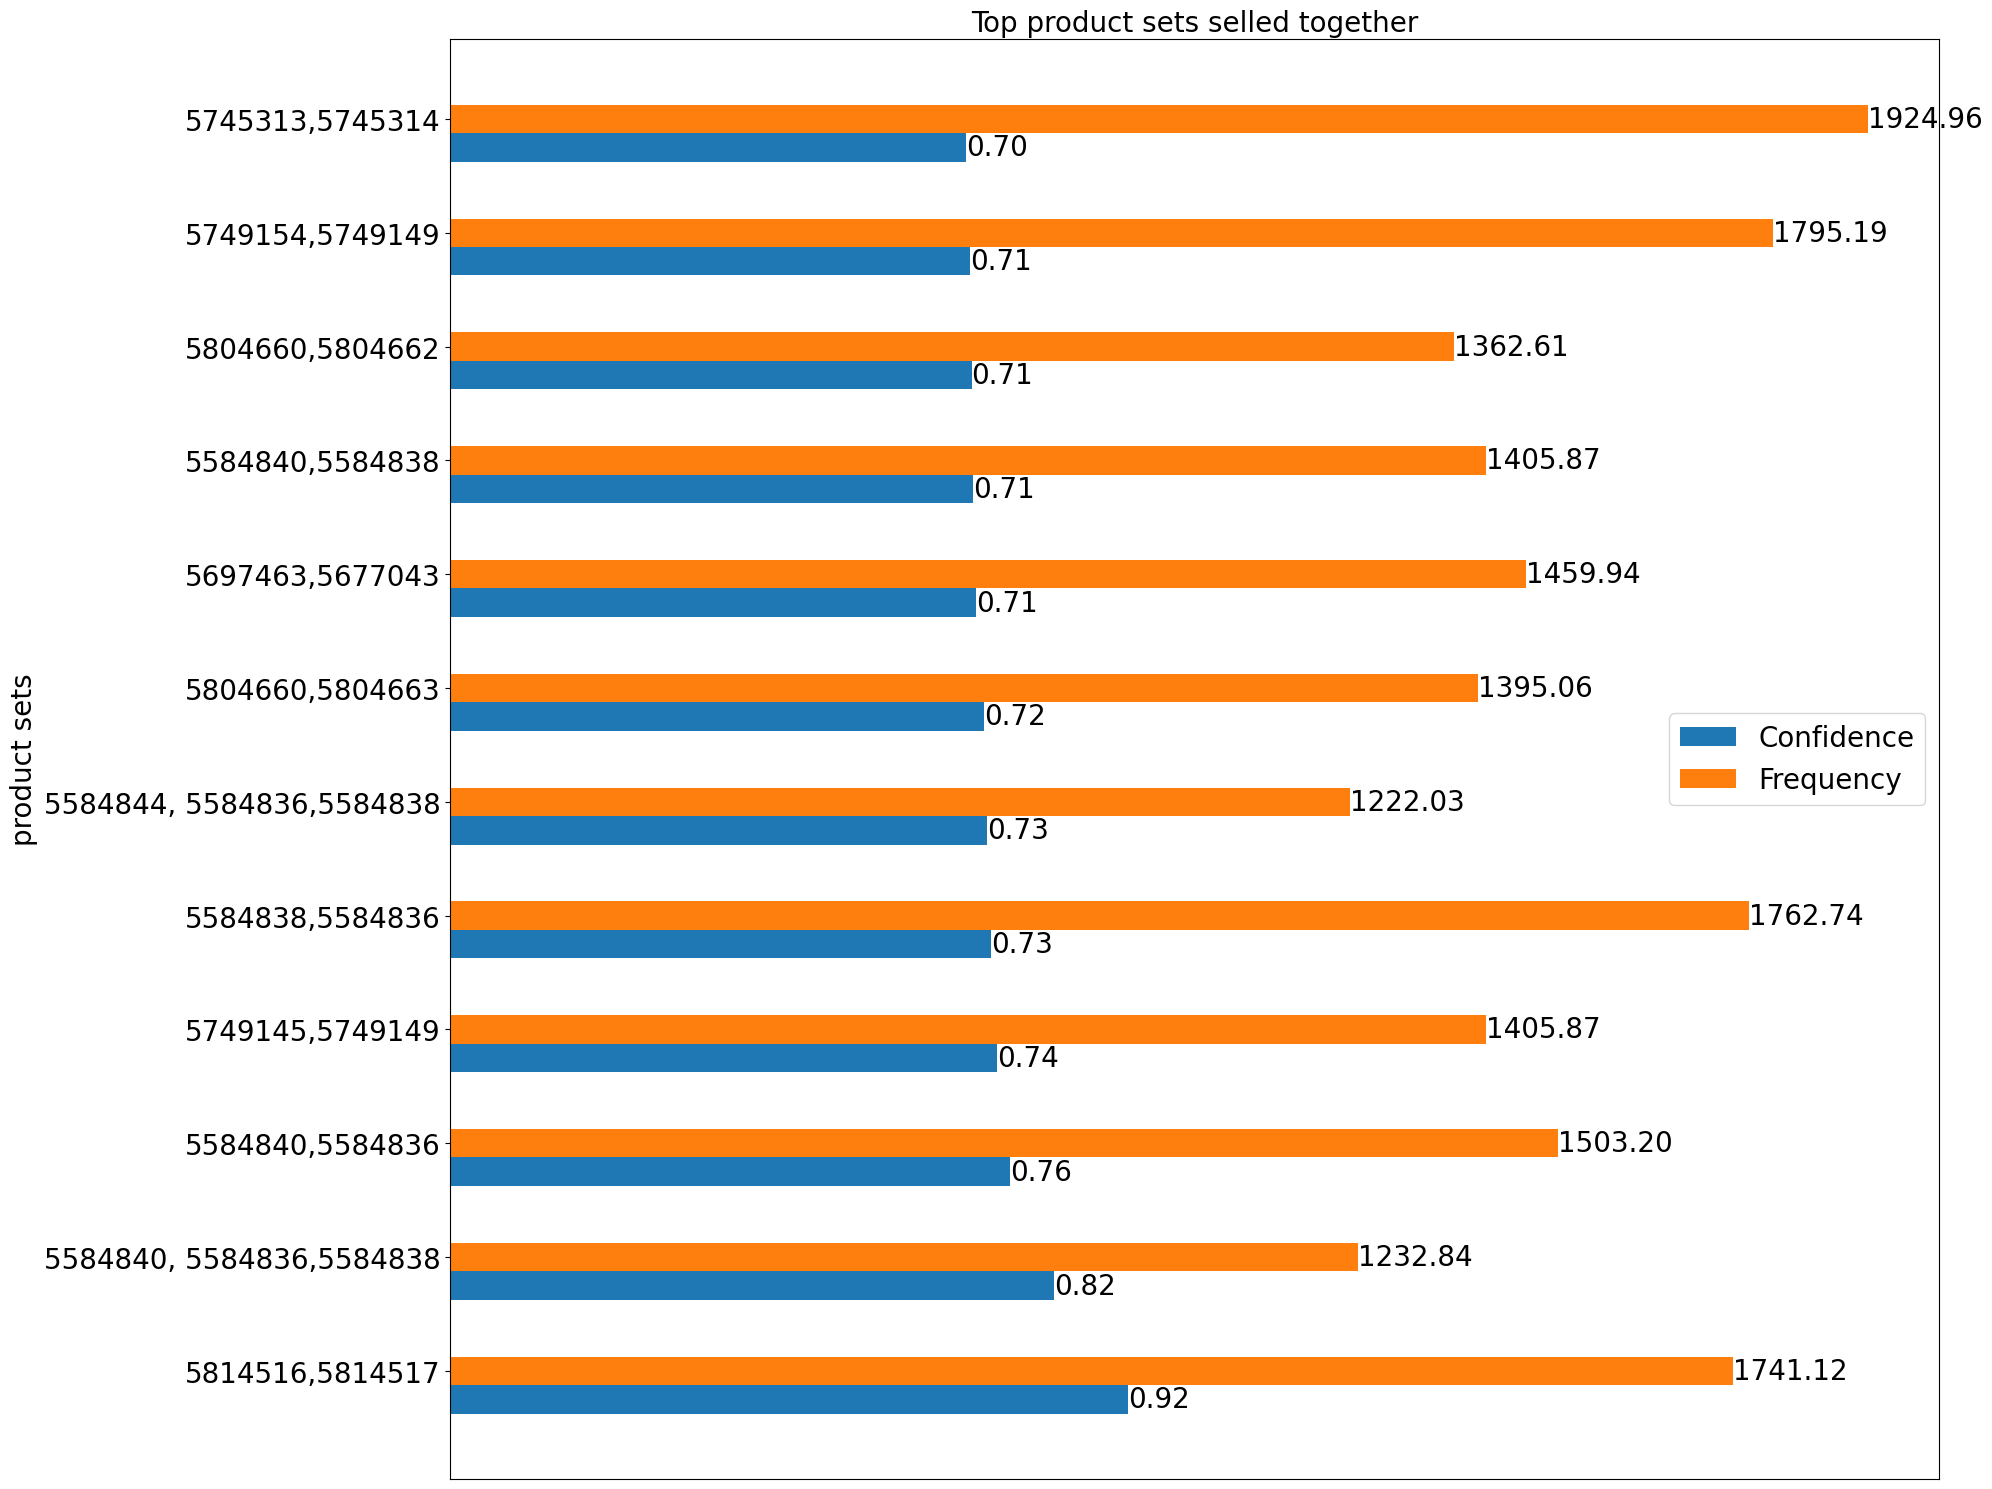

In [59]:
# Sample data
prod = top[['Antecedent','Consequent']].apply(lambda x : ','.join(x.astype(str)),axis=1).tolist()
con = top.Confidence.tolist()
rep = top.Support.tolist()

#scaling
rep_scaled = [x*len(cust_prod)/1000 for x in rep]

# Define bar height
bar_hight = 0.25

# Set x locations for the groups
y = np.arange(len(prod))

# Set the size of the plot
plt.figure(figsize=(20, 15))

# Plotting the bars
b1=plt.barh(y - bar_hight, con, height=bar_hight, label='Confidence')
b2=plt.barh(y, rep_scaled, height=bar_hight, label='Frequency')

# Adding labels and title
plt.ylabel('product sets',fontsize=20)
plt.title('Top product sets selled together', fontsize=20)
plt.yticks(y, prod, fontsize=20)

# Adding legend
plt.legend(fontsize=20)
plt.xticks([])

#adding values to plot
def add_values(bars,factor):
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, '%.2f' % (width*factor), ha='left', va='center', fontsize=20)

# Add values for each set of bars
add_values(b1,1)
add_values(b2,1000)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
########################################################################

In [249]:
df_all['category_id'].nunique()

500

In [250]:
df_all['product_id'].nunique()

45960

In [253]:
df_rec=df_all[['product_id','category_id','price']]
df_rec

,product_id,category_id,price
0,5773203,1487580005134238553,2.62
1,5773353,1487580005134238553,2.62
2,5881589,2151191071051219817,13.48
3,5723490,1487580005134238553,2.62
4,5881449,1487580013522845895,0.56
...,...,...,...
8738115,5830317,1487580009496313889,4.76
8738116,5733064,1487580004832248652,9.37
8738117,5867785,1487580007835370453,31.10
8738118,5779406,2151191071051219817,2.86


In [367]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

df = df_rec.sample(n=500)

def recommend_similar_products(df):
    # Calculate similarity matrix based on category and price
    scaler = MinMaxScaler()
    df[['price']] = scaler.fit_transform(df[['price']])
    category_matrix = pd.get_dummies(df['category_id'])
    features = pd.concat([category_matrix, df['price']], axis=1)
    similarity_matrix = cosine_similarity(features)

    # Get indices of products with highest similarity
    indices = similarity_matrix.argsort(axis=1)[:, ::-1]

    # Recommend products
    recommendations = []
    for i, row in enumerate(indices):
        current_product_category = df.iloc[i]['category_id']
        similar_products_indices = row[1:4]  # Select top 3 similar products (excluding the current product)
        similar_products = df.iloc[similar_products_indices]
        similar_products_same_category = similar_products[similar_products['category_id'] == current_product_category]['product_id'].tolist()
        recommendations.append({'product_id': df.iloc[i]['product_id'], 'similar_products': similar_products_same_category})  
    return recommendations

# Example usage
recommendations = recommend_similar_products(df.head(50))
for rec in recommendations:
    print(f"Recommended products for {rec['product_id']}: {rec['similar_products']}")


Recommended products for 5809730: ['5814523']
Recommended products for 5686898: []
Recommended products for 5866144: []
Recommended products for 5877095: ['5848418', '5833323', '5819112']
Recommended products for 5843772: []
Recommended products for 5902850: []
Recommended products for 5649305: []
Recommended products for 5876927: []
Recommended products for 5889630: []
Recommended products for 5802639: ['5893674']
Recommended products for 4768: ['5726239']
Recommended products for 59003: []
Recommended products for 5905664: []
Recommended products for 5830318: []
Recommended products for 5814523: ['5809730']
Recommended products for 5885587: ['5868559', '5856192']
Recommended products for 15176: []
Recommended products for 5674695: ['5561044']
Recommended products for 5660215: []
Recommended products for 5807864: []
Recommended products for 5875784: ['5881773']
Recommended products for 5746910: []
Recommended products for 5726239: ['4768']
Recommended products for 5893674: ['5802639']

C:\Users\aslan\AppData\Local\Temp\ipykernel_38068\3564722749.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['price']] = scaler.fit_transform(df[['price']])


In [350]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

df = df_rec.sample(n=500)

def recommend_similar_products(df):
    # Calculate similarity matrix based on category and price
    scaler = MinMaxScaler()
    df[['price']] = scaler.fit_transform(df[['price']])
    category_matrix = pd.get_dummies(df['category_id'])
    features = pd.concat([category_matrix, df['price']], axis=1)
    similarity_matrix = cosine_similarity(features)

    # Get indices of products with highest similarity
    indices = similarity_matrix.argsort(axis=1)[:, ::-1]

    # Recommend products
    recommendations = []
    for i, row in enumerate(indices):
        recommendations.append({'product_id': df.iloc[i]['product_id'], 'similar_products': df.iloc[row[1:3]]['product_id'].tolist()})
    return recommendations

# Example usage
recommendations = recommend_similar_products(df.head(5))
for rec in recommendations:
    print(f"Recommended products for {rec['product_id']}: {rec['similar_products']}")

Recommended products for 5866556: ['5873612', '5668003']
Recommended products for 5813852: ['5873612', '5668003']
Recommended products for 5848056: ['5668003', '5873612']
Recommended products for 5668003: ['5848056', '5873612']
Recommended products for 5873612: ['5848056', '5668003']


C:\Users\aslan\AppData\Local\Temp\ipykernel_38068\246139117.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['price']] = scaler.fit_transform(df[['price']])


In [371]:
df_rec[df_rec['product_id'] == '5814523']

,product_id,category_id,price
3417,5814523,1487580005092295511,0.205846
3584,5814523,1487580005092295511,0.205846
4029,5814523,1487580005092295511,0.205846
4154,5814523,1487580005092295511,0.205846
4900,5814523,1487580005092295511,0.205846
...,...,...,...
8722135,5814523,1487580005092295511,0.204765
8734654,5814523,1487580005092295511,0.204765
8736417,5814523,1487580005092295511,0.205846
8737003,5814523,1487580005092295511,0.205846
